## Standing wave

This code plots two counter-progating waves and their sum at different times. The sum is a **standing wave**
see Sec. 3.4 in <a href="https://global.oup.com/academic/product/optics-f2f-9780198786795?cc=gb&lang=en&">Opticsf2f</a>.

At the bottom we make an **animation**. You will need to install the package gif to run this.

The Jupyter Notebook is StandingWave.ipynb see

https://github.com/opticsf2f/Opticsf2f_CodeBook

<div class="interactive-start" onclick="initInteractiveCode()" title="This runs Python in your browser, allowing you local calculations">CLICK HERE TO ACTIVATE CODE CELLS</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rc('text', usetex = True)

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

Using the subplots command in matplotlib, we make arrays of plots that are indexed using axs. For a 1 by N array there is only one index.
Below we make 21 plots in a column with the time increasing as we move down.

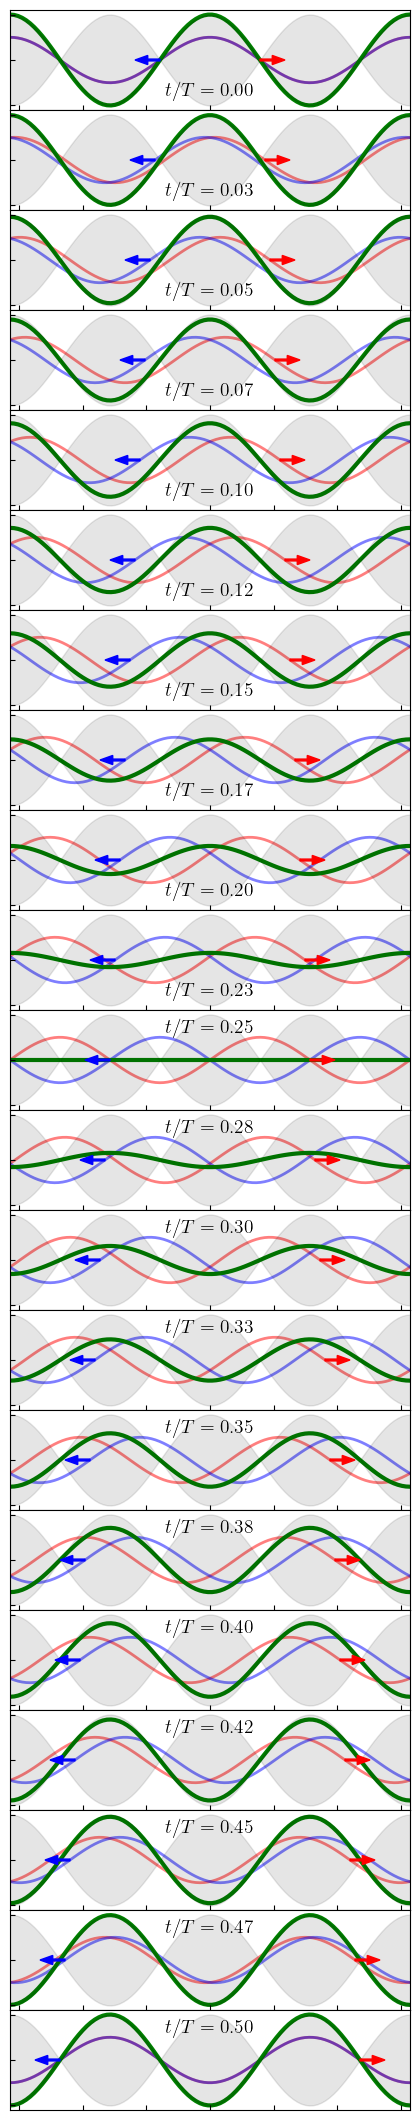

In [2]:
cols = 1
rows = 21

num = 100
xmax = 2*np.pi
x = np.arange(-xmax,(num+1)/num*xmax,2*xmax/(num-1))

colours=['r','b']
lw =3

fig, axs = plt.subplots(rows,cols,figsize = (4*cols,rows))

for ii in range (0,rows):
    t = np.pi/(rows-1)*ii
    tp = t/(2*np.pi)
    axs[ii].plot(x,0.5*np.cos(x-t),color='r',alpha=0.5,linewidth=2,zorder=1)
    axs[ii].plot(x,0.5*np.cos(x+t),color='b',alpha=0.5,linewidth=2,zorder=1)
    axs[ii].plot(x,0.5*np.cos(x+t)+0.5*np.cos(x-t),color='g',alpha=1.0,linewidth=lw,zorder=1)
    axs[ii].fill_between(x,-np.cos(x),np.cos(x),color='black',alpha=0.1)
    if t < np.pi/2:
        axs[ii].text(0-0.225*xmax,-0.8,r'$t/T= %.2f $' %tp,fontsize=14)
    else:
        axs[ii].text(0-0.225*xmax,0.6,r'$t/T= %.2f $' %tp,fontsize=14)
    arrow = mpatches.FancyArrow(np.pi/2+t, 0, np.pi/4, 0, width=0.04, head_width = 0.2, 
                        head_length = 0.4, length_includes_head=True, color = 'red')
    axs[ii].add_patch(arrow)
    arrow = mpatches.FancyArrow(-np.pi/2-t, 0, -np.pi/4, 0, width=0.04, head_width = 0.2, 
                        head_length = 0.4, length_includes_head=True, color = 'blue')
    axs[ii].add_patch(arrow)
    axs[ii].set_xlim(-xmax,xmax)
    axs[ii].set_ylim(-1.1,1.1)
    axs[ii].set_xticklabels([])
    axs[ii].set_yticklabels([])
     
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.0,hspace=0.0)

In [3]:
fig.savefig('StandingWave.png', dpi=300, facecolor='white', edgecolor='white')

Now we make an animation. The animation is commented out 
for the jupyter book version. To make a new gif uncomment the lines that
include gif and frames = ....

In [4]:
#import gif

#@gif.frame

def Individual(frame_number):
    N = 100
    t = np.pi/(N-1)*frame_number
    tp = t/(2*np.pi)   
    fig, ax = plt.subplots(figsize=(4,2),dpi=100)
    ax.plot(x,0.5*np.cos(x-t),color='r',alpha=0.5,linewidth=2,zorder=1)
    ax.plot(x,0.5*np.cos(x+t),color='b',alpha=0.5,linewidth=2,zorder=1)
    ax.plot(x,0.5*np.cos(x+t)+0.5*np.cos(x-t),color='g',alpha=1.0,linewidth=lw,zorder=1)
    ax.fill_between(x,-np.cos(x),np.cos(x),color='black',alpha=0.1)
    if t < np.pi/2 or t > 3*np.pi/2:
        ax.text(0-0.225*xmax,-0.8,r'$t/T= %.2f $' %tp,fontsize=12)
    else:
        ax.text(0-0.225*xmax,0.6,r'$t/T= %.2f $' %tp,fontsize=12)
    arrow = mpatches.FancyArrow(np.pi/2+t, 0, np.pi/4, 0, width=0.04, head_width = 0.2, 
                        head_length = 0.4, length_includes_head=True, color = 'red')
    ax.add_patch(arrow)
    arrow = mpatches.FancyArrow(-np.pi/2-t, 0, -np.pi/4, 0, width=0.04, head_width = 0.2, 
                        head_length = 0.4, length_includes_head=True, color = 'blue')
    ax.add_patch(arrow)
    ax.set_xlim(-xmax,xmax)
    ax.set_ylim(-1.1,1.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

N = 200
#frames = [Individual(frame) for frame in range(0, N-1)]

#gif.save(frames, 'Standing.gif', duration=1, unit="ms", between="frames")

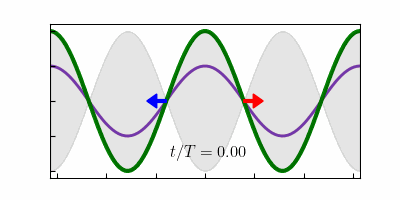

In [3]:
from IPython.display import Image
display(Image(data=open('Standing.gif','rb').read(), format='png'))